In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/signsAndAllUnzipped/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/signsAndAllUnzipped/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/signsAndAllUnzipped/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
dfn = train_df.copy()
dfn.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
samplen = dfn.sample(3000)
samplen.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3563,13,142,144,148,152,156,158,160,162,165,...,103,105,111,163,197,199,198,198,196,196
18412,4,151,153,156,157,160,160,162,163,165,...,105,102,88,109,195,197,197,197,196,196
886,15,105,106,118,130,140,150,156,161,162,...,172,171,162,143,126,119,115,110,112,140
13401,4,151,153,156,157,160,160,162,163,165,...,105,101,91,105,197,197,197,197,196,196
7166,11,171,173,177,182,186,191,193,197,199,...,142,140,138,138,138,137,139,155,222,250


In [ ]:
corr_matrix = dfn.corr()
corr_matrix.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.136272,-0.129994,-0.113213,-0.104100,-0.097174,-0.096604,-0.086760,-0.074889,-0.069481,...,-0.026358,-0.058140,-0.083063,-0.080966,-0.060393,-0.047260,-0.039771,-0.030824,-0.021529,-0.006100
pixel1,-0.136272,1.000000,0.980925,0.963479,0.945856,0.927414,0.903463,0.878273,0.857203,0.830903,...,0.247990,0.245928,0.266477,0.281247,0.262816,0.255951,0.244069,0.220163,0.186064,0.171375
pixel2,-0.129994,0.980925,1.000000,0.978006,0.952741,0.946009,0.924298,0.899308,0.880546,0.856741,...,0.252370,0.250124,0.267791,0.281535,0.266011,0.259662,0.249105,0.227187,0.194068,0.176169
pixel3,-0.113213,0.963479,0.978006,1.000000,0.978557,0.958317,0.949978,0.932616,0.915696,0.892115,...,0.260565,0.254763,0.269901,0.275948,0.257800,0.251580,0.242006,0.216101,0.183085,0.169881
pixel4,-0.104100,0.945856,0.952741,0.978557,1.000000,0.978603,0.962856,0.954735,0.943060,0.919271,...,0.255885,0.250386,0.265855,0.272967,0.254942,0.248175,0.239362,0.216395,0.182166,0.166320


<Axes: >

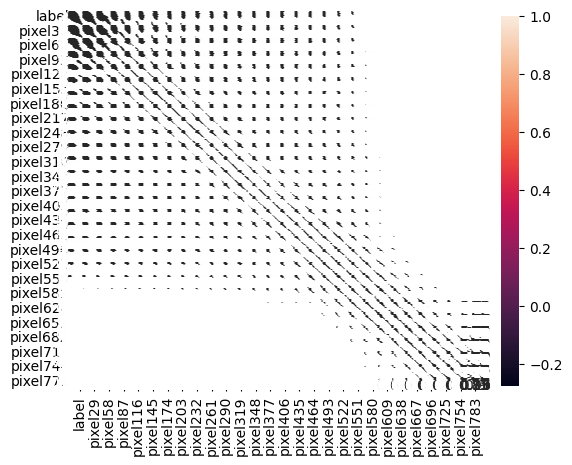

In [ ]:
sns.heatmap(corr_matrix, annot=True)

<Axes: xlabel='label', ylabel='count'>

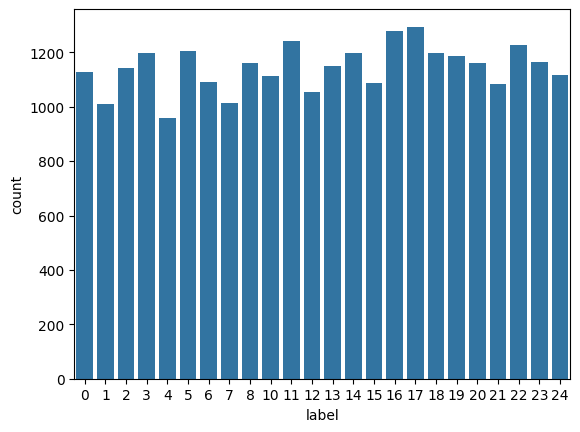

In [ ]:
sns.countplot(data=dfn, x='label')

<Axes: xlabel='label', ylabel='Count'>

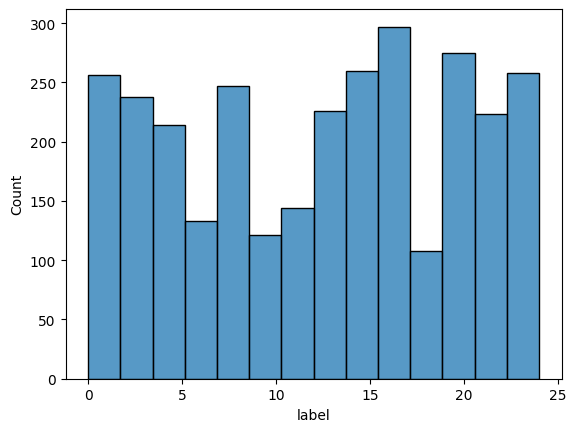

In [ ]:
sns.histplot(data=samplen, x="label")

<Axes: xlabel='label', ylabel='Density'>

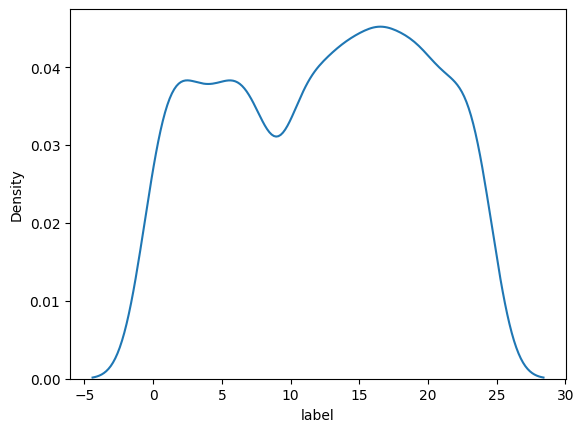

In [ ]:
sns.kdeplot(data=samplen, x="label")

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

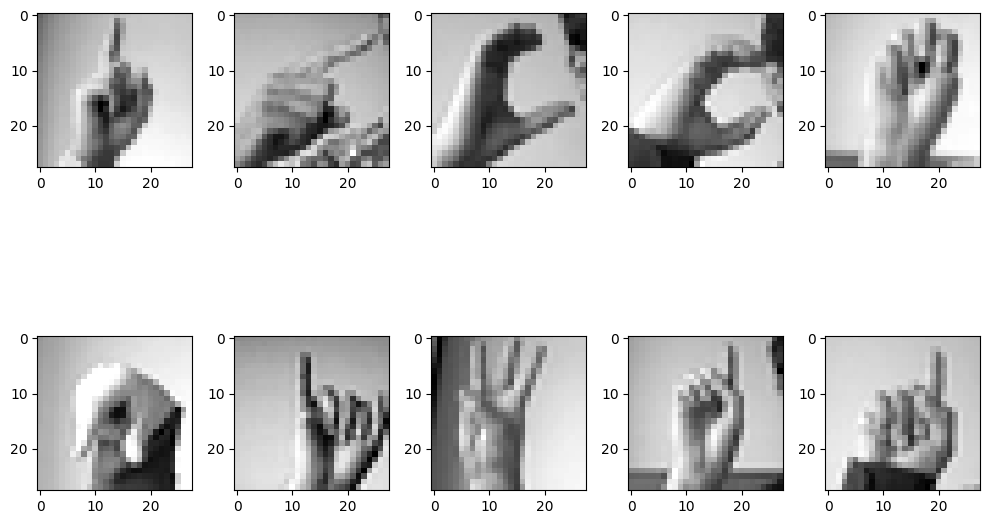

In [ ]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 18s 55ms/step - loss: 1.0669 - accuracy: 0.6672 - val_loss: 3.2465 - val_accuracy: 0.1247 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 11s 51ms/step - loss: 0.2189 - accuracy: 0.9284 - val_loss: 1.2141 - val_accuracy: 0.5958 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 45ms/step - loss: 0.1007 - accuracy: 0.9685 - val_loss: 0.0932 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 10s 44ms/step - loss: 0.0668 - accuracy: 0.9781 - val_loss: 0.1322 - val_accuracy: 0.9593 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0273 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0706 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - ETA:

In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 1s 4ms/step - loss: 6.1926e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


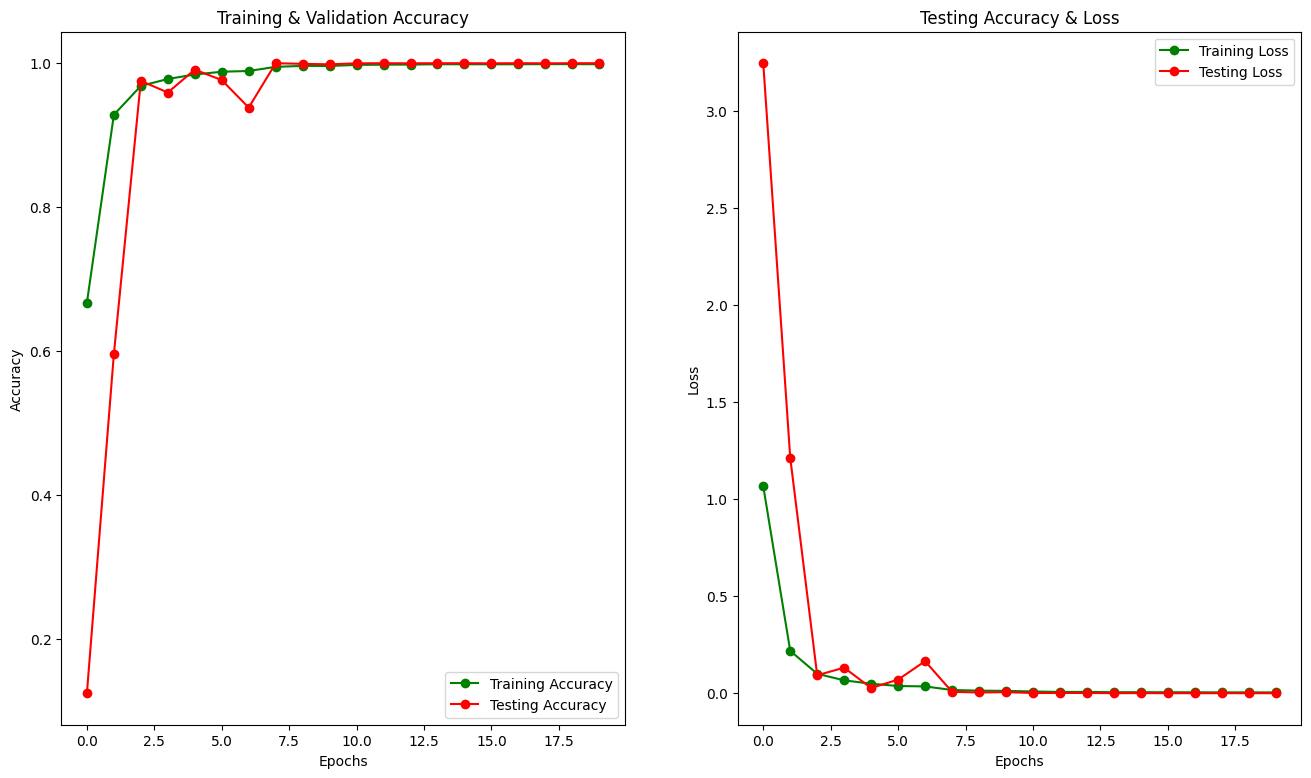

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()
model.save('smnist_X5.h5')

225/225 [==============================] - 1s 4ms/step


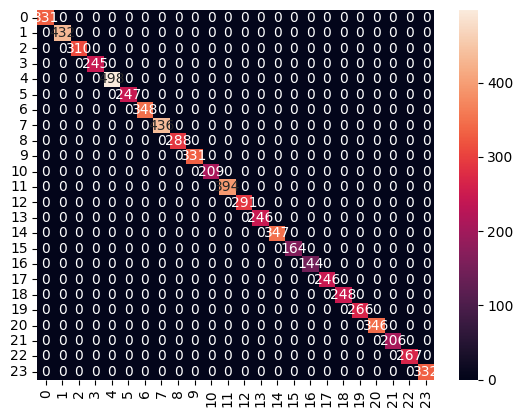

In [ ]:
# prompt: Build a confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the model
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


225/225 [==============================] - 1s 4ms/step


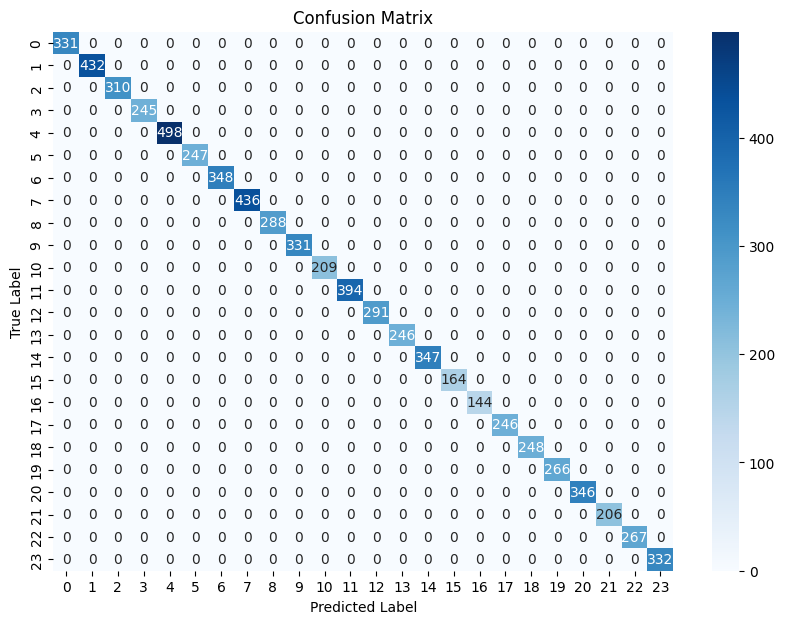

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'model' and 'x_test' are defined and you have model.predict
# Also assuming y_test is your true labels as one-hot encoded which you convert with argmax

# Get predictions from the model
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Set the size of the figure
plt.figure(figsize=(10, 7))  # Adjust the size as needed

# Visualize confusion matrix with a blue-white color map
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:

import tensorflow as tf

# Load the Keras model
keras_model = tf.keras.models.load_model('/content/smnist_X5.h5')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
open("smnist_X5_lite.tflite", "wb").write(tflite_model)

1060892